# Tarea #5: Redes renuronales para clasificacion en python

## Procedimiento 1:
Usando la función de train_test_split de sklearn, establezca el
conjunto de datos de entrenamiento y de validación tomando como tamaño para el
entrenamiento del 70% de los datos. Las variables explicativas corresponden a: "SEXO",
"P_PMAN_IRIS" (principal causa de muerte) y "T_GES" (tiempo de gestación). La variable
respuesta corresponde a: "PESO_NAC". Previo a este procedimiento usted debe implementar
las correspondientes variables dummie para la entrada.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [3]:
from google.colab import files
uploaded = files.upload()

Saving fetal2020.csv to fetal2020.csv


In [4]:
import io
tabla = pd.read_csv(io.BytesIO(uploaded['fetal2020.csv']), sep = ",", index_col=0, encoding='latin-1')
# tabla = pd.read_csv(io.BytesIO(uploaded['natalidad.csv']), sep = ";", index_col=0, encoding='latin-1')
tabla.head(4)

<ipython-input-4-63b2ddeb0714>:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  tabla = pd.read_csv(io.BytesIO(uploaded['fetal2020.csv']), sep = ",", index_col=0, encoding='latin-1')


,COD_MUNIC,A_DEFUN,SIT_DEFUN,OTRSITIODE,TIPO_DEFUN,ANO,MES,HORA,MINUTOS,SEXO,...,C_MUERTEB,C_MUERTEC,C_MUERTED,C_MUERTEE,ASIS_MED,CAUSA_MULT,C_BAS1,CAUSA_667,IDPROFCER,CAU_HOMOL
COD_DPTO,,,,,,,,,,,,,,,,,,,,,
70,1,1,1,NaN,1,2020,5,0,0,3,...,1.0,NaN,NaN,NaN,1,P018,P018,402,1,80
11,1,1,1,NaN,1,2020,5,0,0,3,...,1.0,NaN,NaN,NaN,1,P018,P018,402,1,80
11,1,1,1,NaN,1,2020,5,0,0,1,...,1.0,NaN,NaN,NaN,1,P059/P011,P011,402,1,80
11,1,1,1,NaN,1,2020,5,0,0,3,...,1.0,NaN,NaN,NaN,1,P018,P018,402,1,80


In [5]:
df = tabla[["SEXO", "P_PMAN_IRIS", "PESO_NAC", "T_GES", "ASIS_MED"]]
df.head(6)

,SEXO,P_PMAN_IRIS,PESO_NAC,T_GES,ASIS_MED
COD_DPTO,,,,,
70,3,NaN,9,1,1
11,3,0.0,1,1,1
11,1,0.0,1,2,1
11,3,NaN,1,1,1
11,2,NaN,3,3,1
11,3,NaN,1,1,1


In [6]:
# Reemplazar los valores nulos en la columna "P_PMAN_IRIS" con 6
df['P_PMAN_IRIS'] = df['P_PMAN_IRIS'].fillna(6)
#Guardamos nuestro dataframe modificado sin valores NaN en un duevo dataframe llamado df1
df1 = df.copy()
df1.head(6)

<ipython-input-6-accdb04909a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['P_PMAN_IRIS'] = df['P_PMAN_IRIS'].fillna(6)


,SEXO,P_PMAN_IRIS,PESO_NAC,T_GES,ASIS_MED
COD_DPTO,,,,,
70,3,6.0,9,1,1
11,3,0.0,1,1,1
11,1,0.0,1,2,1
11,3,6.0,1,1,1
11,2,6.0,3,3,1
11,3,6.0,1,1,1


In [7]:
df1["P_PMAN_IRIS"].value_counts()

6.0    28474
0.0     4716
5.0       55
1.0       39
3.0       29
2.0       14
Name: P_PMAN_IRIS, dtype: int64

In [8]:
dummia = pd.get_dummies(df1['SEXO'])
dummia.columns = ['Masculino','Femenino','Indeterminado']
dummia

,Masculino,Femenino,Indeterminado
COD_DPTO,,,
70,0,0,1
11,0,0,1
11,1,0,0
11,0,0,1
11,0,1,0
...,...,...,...
41,0,0,1
11,0,0,1
11,0,0,1


In [9]:
dummib = pd.get_dummies(df1['P_PMAN_IRIS'])
dummib.columns = ['Medico','Enfermo','Auxiliar','Promotor','FuncionarioRG','Medico Logistica']
dummib

,Medico,Enfermo,Auxiliar,Promotor,FuncionarioRG,Medico Logistica
COD_DPTO,,,,,,
70,0,0,0,0,0,1
11,1,0,0,0,0,0
11,1,0,0,0,0,0
11,0,0,0,0,0,1
11,0,0,0,0,0,1
...,...,...,...,...,...,...
41,0,0,0,0,0,1
11,0,0,0,0,0,1
11,1,0,0,0,0,0


In [10]:
dummic = pd.get_dummies(df1['T_GES'])
dummic.columns = ['< 22 sem','22-27 sem','28-37 sem','38-41 sem','> 42 sem','Sin información']
dummic

,< 22 sem,22-27 sem,28-37 sem,38-41 sem,> 42 sem,Sin información
COD_DPTO,,,,,,
70,1,0,0,0,0,0
11,1,0,0,0,0,0
11,0,1,0,0,0,0
11,1,0,0,0,0,0
11,0,0,1,0,0,0
...,...,...,...,...,...,...
41,1,0,0,0,0,0
11,1,0,0,0,0,0
11,1,0,0,0,0,0


In [11]:
df1.loc[(df1.PESO_NAC == 1),'PESO_NAC'],df1.loc[(df1.PESO_NAC == 2),'PESO_NAC'],df1.loc[(df1.PESO_NAC==3),'PESO_NAC'] = '< 1000','1000 - 1499','1500 - 1999'
df1.loc[(df1.PESO_NAC == 4),'PESO_NAC'],df1.loc[(df1.PESO_NAC == 5),'PESO_NAC'],df1.loc[(df1.PESO_NAC==6),'PESO_NAC'] = '2000 - 2499','2500 - 2900','3000 - 3499'
df1.loc[(df1.PESO_NAC == 7),'PESO_NAC'],df1.loc[(df1.PESO_NAC == 8),'PESO_NAC'],df1.loc[(df1.PESO_NAC==9),'PESO_NAC'] = '3500 - 3999',' > 4000','Sin informacion'
df1['PESO_NAC']

COD_DPTO
70    Sin informacion
11             < 1000
11             < 1000
11             < 1000
11        1500 - 1999
           ...       
41             < 1000
11    Sin informacion
11    Sin informacion
76             < 1000
11             < 1000
Name: PESO_NAC, Length: 33327, dtype: object

In [12]:
dummifinal = pd.concat([dummia,dummib,dummic,df1.PESO_NAC],axis=1)
dummifinal.head(5)

,Masculino,Femenino,Indeterminado,Medico,Enfermo,Auxiliar,Promotor,FuncionarioRG,Medico Logistica,< 22 sem,22-27 sem,28-37 sem,38-41 sem,> 42 sem,Sin información,PESO_NAC
COD_DPTO,,,,,,,,,,,,,,,,
70,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,Sin informacion
11,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,< 1000
11,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,< 1000
11,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,< 1000
11,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1500 - 1999


In [50]:
x2 = dummifinal.drop('PESO_NAC',axis=1)
y2 = dummifinal['PESO_NAC']
X_train,X_test,y_train,y_test = train_test_split(x2,y2,test_size=0.3)
y_train

COD_DPTO
15             < 1000
41             < 1000
11             < 1000
23             < 1000
54    Sin informacion
           ...       
11             < 1000
25             < 1000
25    Sin informacion
41             < 1000
86             < 1000
Name: PESO_NAC, Length: 23328, dtype: object

## Procedimiento 2:
 Usando la función MLPClassifier entrene una red neuronal utilizando los
siguientes argumentos:

In [63]:
mlp_clfn = MLPClassifier(hidden_layer_sizes=(24,24,24,24,24,24,24,24,24,24,24),
                         max_iter = 500, activation='relu',
                         solver = 'adam')

mlp_clfn.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24),
              max_iter=500)

In [64]:
y_pred = mlp_clfn.predict(X_test)

## Procedimiento 3:
Haga la matriz de confusión y la gráfica de la curva de pérdida. De acuerdo
con estas ¿Hay un buen ajuste del modelo a los datos? Para ello determine la también la
exactitud.

In [65]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test,y_pred)))

Accuracy: 0.75


In [66]:
from sklearn.metrics import confusion_matrix
import pylab as pl
cm = confusion_matrix(y_test,y_pred)
cm

array([[   0,    0,    5,    0,    0,   19,    0,    1,    0],
       [   0,   15,  191,    0,    0,    2,    0,   78,    0],
       [   0,   19,  212,    0,    1,    7,    0,    7,    0],
       [   0,   12,  142,    0,    0,   34,    0,    4,    0],
       [   0,    1,  118,    1,    0,   79,    0,    3,    0],
       [   0,    3,   36,    2,    1,   98,    0,    3,    0],
       [   0,    1,    7,    2,    0,   46,    0,    1,    0],
       [   0,   11,   93,    0,    0,    1,    0, 7180,    0],
       [   0,    0,    0,    0,    0,    1,    0, 1562,    0]])

<Axes: >

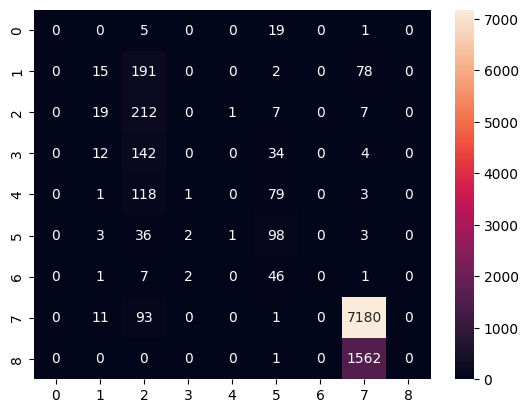

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt = 'g',ax=ax)

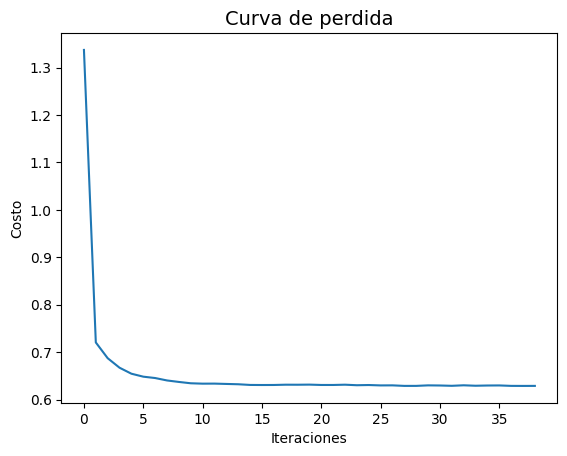

In [68]:
plt.plot(mlp_clfn.loss_curve_)
plt.title('Curva de perdida', fontsize=14)
plt.xlabel('Iteraciones')
plt.ylabel('Costo')
plt.show()

**Conclusión procedimiento 3:** Podemos ver por medio de la exactitud de mi modelo y la matriz de cofusión que si bien mi modelo no es exactamente malo, tampoco es una maravilla, ya que si bien tiene una exactitud relativamente alta con un 0.75 aun tiene varias fallas en sus predicciones por lo que no es un modelo del todo fiable; por otra parte visualizando la función de perdida se puede visualizar como esta aproximadamente llega un punto el cual es aproximadamentesobre la decima iteración que ya casi no suele bajar, es decir que realmente las 500 iteraciones no estan aportando mucho a mi modelo, y con aproximadamente 10 iteraciones tendriamos un resultado similar al que obtuvimos con las 500 iteraciones.

## Procedimiento 4:
Determine las condiciones de las variables explicativas bajo las cuáles un
bebé presentó bajo peso al momento de su fallecimiento. Para ello haga la predicción del
modelo cambiando las condiciones de la principal causa de muerte, el sexo y el tiempo de
gestación.

In [20]:
no_obs = np.array([[1,0,0,0,1,0,0,0,0,0,0,1,0,0,0]])
mlp_clfn.predict(no_obs)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array(['< 1000'], dtype='<U15')

In [23]:
no_obs = np.array([[1,0,0,0,1,0,0,0,0,0,1,0,0,0,0]])
mlp_clfn.predict(no_obs)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array(['< 1000'], dtype='<U15')

In [24]:
no_obs = np.array([[1,0,0,0,1,0,0,0,0,0,0,0,1,0,0]])
mlp_clfn.predict(no_obs)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array(['3000 - 3499'], dtype='<U15')

In [25]:
no_obs = np.array([[1,0,0,0,1,0,0,0,0,0,0,0,0,1,0]])
mlp_clfn.predict(no_obs)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array(['< 1000'], dtype='<U15')

In [26]:
no_obs = np.array([[1,0,0,0,1,0,0,0,0,0,0,0,0,0,1]])
mlp_clfn.predict(no_obs)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array(['< 1000'], dtype='<U15')

In [27]:
no_obs = np.array([[1,0,0,0,0,1,0,0,0,0,0,0,0,0,1]])
mlp_clfn.predict(no_obs)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array(['< 1000'], dtype='<U15')

In [28]:
no_obs = np.array([[1,0,0,0,0,0,1,0,0,0,0,0,0,0,1]])
mlp_clfn.predict(no_obs)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array(['< 1000'], dtype='<U15')

In [29]:
no_obs = np.array([[1,0,0,0,0,0,0,1,0,0,0,0,0,0,1]])
mlp_clfn.predict(no_obs)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array(['< 1000'], dtype='<U15')

In [30]:
no_obs = np.array([[1,0,0,0,0,0,0,1,0,0,0,0,1,0,0]])
mlp_clfn.predict(no_obs)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array(['3000 - 3499'], dtype='<U15')

In [31]:
no_obs = np.array([[1,0,0,0,0,0,0,0,1,0,0,0,1,0,0]])
mlp_clfn.predict(no_obs)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array(['3000 - 3499'], dtype='<U15')

In [32]:
no_obs = np.array([[1,0,0,0,0,0,0,0,1,0,0,1,0,0,0]])
mlp_clfn.predict(no_obs)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array(['1500 - 1999'], dtype='<U15')

In [69]:
no_obs = np.array([[0,1,0,0,1,0,0,0,0,0,0,0,0,1,0]])
mlp_clfn.predict(no_obs)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array(['3000 - 3499'], dtype='<U15')

In [70]:
no_obs = np.array([[0,1,0,0,1,0,0,0,0,0,0,0,1,0,0]])
mlp_clfn.predict(no_obs)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array(['3000 - 3499'], dtype='<U15')

In [71]:
no_obs = np.array([[0,1,0,0,1,0,0,0,0,0,0,1,0,0,0]])
mlp_clfn.predict(no_obs)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array(['1500 - 1999'], dtype='<U15')

In [73]:
no_obs = np.array([[0,1,0,0,1,0,0,0,0,0,1,0,0,0,0]])
mlp_clfn.predict(no_obs)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array(['< 1000'], dtype='<U15')

In [76]:
no_obs = np.array([[0,1,0,0,0,1,0,0,0,0,0,1,0,0,0]])
mlp_clfn.predict(no_obs)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array(['1500 - 1999'], dtype='<U15')

In [77]:
no_obs = np.array([[0,1,0,0,0,0,1,0,0,0,0,1,0,0,0]])
mlp_clfn.predict(no_obs)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array(['2500 - 2900'], dtype='<U15')

In [78]:
no_obs = np.array([[0,1,0,0,0,0,0,1,0,0,0,1,0,0,0]])
mlp_clfn.predict(no_obs)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array(['1000 - 1499'], dtype='<U15')

In [79]:
no_obs = np.array([[0,1,0,0,0,0,0,0,1,0,0,1,0,0,0]])
mlp_clfn.predict(no_obs)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array(['1500 - 1999'], dtype='<U15')

**Conclusión procedimiento 4:** Aqui podemos ver y variando las diferenets variables que el tiempo de gestación a la hora de la muerte del bebe es bastante significativo a la hora de ver su peso, ya que normalmente cuando el bebe tiene menos de 28 semanas este presenta un peso menor a los 1000 gramos, por otra parte si el bebe es homber o mujer tambien afecta de cierta manera ya que el algoritmo predice que si el infante es hombre y supera las 41 semanas es probable que tenga menos de 1000 gramos, por otra parte con las niñas no pasa esto.

## Procedimiento 5:
Implemente un modelo con el doble de capas ocultas del procedimiento 2,
utilizando los mismos argumentos dados en tal procedimiento ¿Qué modelo tiene mayor
exactitud? Haga la gráfica de la curva de pérdida e interprétela.

In [80]:
mlp_clfn = MLPClassifier(hidden_layer_sizes=(24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24),
                         max_iter = 500, activation='relu',
                         solver = 'adam')

mlp_clfn.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
                                  24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24),
              max_iter=500)

In [81]:
y_pred = mlp_clfn.predict(X_test)

In [82]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test,y_pred)))

Accuracy: 0.75


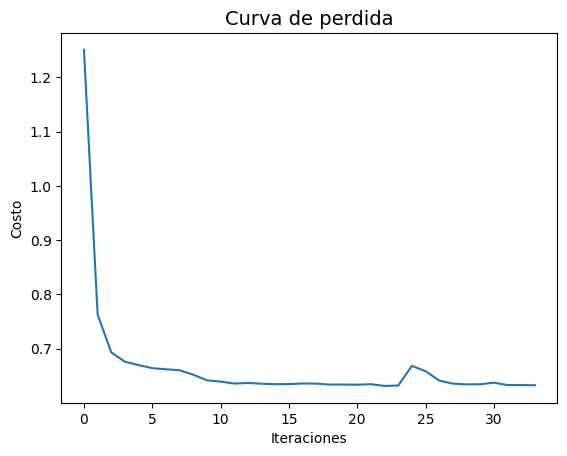

In [83]:
plt.plot(mlp_clfn.loss_curve_)
plt.title('Curva de perdida', fontsize=14)
plt.xlabel('Iteraciones')
plt.ylabel('Costo')
plt.show()

**Conclusión procedimiento 5:** Aqui podemos ver como al doblar el numero de capas de nuestro modelo de aprendizaje de maquina, nuestra precision continua siendo la misma que antes al usar solo la mitad de la cantidad de numero de capas, es decir que adicionar más neuronas al modelo no soluciona el problema , por otra parte vemos como el modelo llega incluso a desmejorar, viendo como en la curva de perdida, hay un leve aumento del error en aproximadamente la iteración 24-25